In [3]:
import networkx as nx
import numpy as np 


In [4]:

sample_data = np.ones((2, 2)) #data # = 2, 3 features 
cosftn = lambda x, y : np.dot(x, y)


In [5]:
#quantum feature map 돌려보기 

from qiskit_machine_learning.kernels import QuantumKernel
from qiskit import BasicAer
from qiskit.circuit.library import ZZFeatureMap
from qiskit.utils import QuantumInstance, algorithm_globals

In [6]:
from qiskit import IBMQ

In [7]:
# from qiskit.test.mock import FakeProvider
# provider = FakeProvider()

KeyboardInterrupt: 

In [ ]:
# backend = provider.get_backend('fake_paris')

In [ ]:
feature_map = ZZFeatureMap(feature_dimension=4, reps=2, entanglement="linear")
seed = 100
backend = QuantumInstance(
    BasicAer.get_backend("qasm_simulator"), shots=512, seed_simulator=seed, seed_transpiler=seed
)
#backend = backend
kernel = QuantumKernel(feature_map=feature_map, quantum_instance=backend)


In [ ]:
sample_data = np.random.random((5, 4))
data = np.load("./data/drug145_5.npy")
d = kernel.evaluate(data[:5, 1:])
print(d)

[[1.         0.00195313 0.04101562 0.02148437 0.13085937]
 [0.00195313 1.         0.0546875  0.859375   0.03710938]
 [0.04101562 0.0546875  1.         0.07617188 0.03125   ]
 [0.02148437 0.859375   0.07617188 1.         0.04492187]
 [0.13085937 0.03710938 0.03125    0.04492187 1.        ]]


In [ ]:
d = np.ones_like(d)-d 
np.fill_diagonal(d, 0)
print(d)

AttributeError: 'numpy.ndarray' object has no attribute 'list'

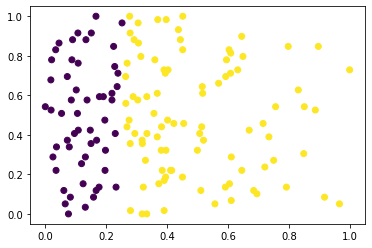

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(data[:,4], data[:,3], c=data[:,0])

In [ ]:
data[:5, :]

array([[1.        , 1.        , 1.        , 0.13559322, 0.59156001],
       [0.        , 0.5       , 1.        , 0.22033898, 0.03532505],
       [1.        , 0.        , 1.        , 0.77966102, 0.35990369],
       [0.        , 0.5       , 1.        , 0.11864407, 0.06095552],
       [1.        , 0.5       , 1.        , 0.57627119, 0.30389051]])

In [ ]:
%load_ext autoreload
%autoreload 2
from src.graph import *
from src.QAOA import * 
from scipy.optimize import minimize


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


     fun: -5.904296875
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 72
  status: 1
 success: True
       x: array([1.52911586, 0.93972395, 2.01923038, 0.55546884, 0.78007286,
       0.76967778])


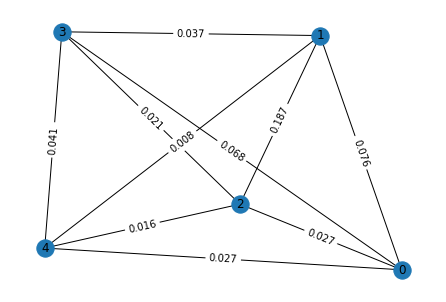

In [ ]:
graph = generate_graph_from_numpy(d)
    
#graph = get_example_graph()
#params length = 2p 
params = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
qaoa = Qaoa(graph)

res = minimize(qaoa.execute_circ, 
                params, 
                method='COBYLA')
print(res)

In [ ]:
p = 1 
filepath = "./test.txt"
def func(x, y):
    return np.dot(x,y)
with open(filepath, "a") as file: 
    file.write(f"p = {p}, distance function = {func.__name__}")
    file.write("\n")
    file.write(str(res))
    file.write("\n========================================================================================================\n")
    

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np 
import itertools 
def plot(cm, labels= True, normalize = False):
    cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    #plt.title(title)
    plt.colorbar()
    
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    if labels:
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            if normalize:
                plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                         horizontalalignment="center",
                         color="white" if cm[i, j] > thresh else "black")
            else:
                plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                         horizontalalignment="center",
                         color="white" if cm[i, j] > thresh else "black")


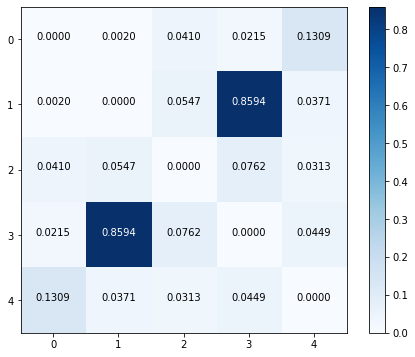

In [58]:
plot(d)

In [2]:
def norm(x:np.array):
    """get L2 norm 

    Args:
        x (np.array): vector

    Returns:
        magnitude of x (sum(x^2))^(1/2)
    """
    return np.sqrt(np.dot(x, x))

def sin_dist(x:np.array, y:np.array):
    """get sin distance of two vectors

    Args:
        x (np.array): vector
        y (np.array): another vector same size with x

    Returns:
        float: sqrt(1- cos^2) 
    """
    return np.sqrt(1-(np.dot(x, y)/ norm(x)/norm(y))**2)



NameError: name 'np' is not defined